# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64


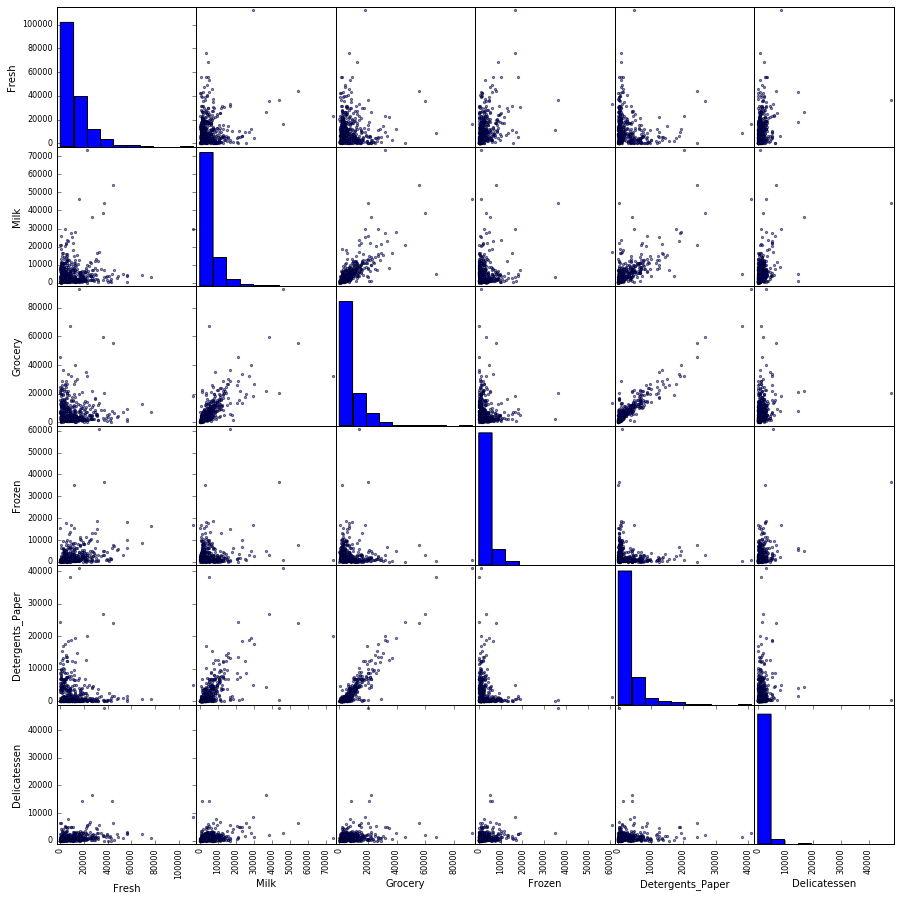

In [2]:
from pandas.tools.plotting import scatter_matrix
s=scatter_matrix(data,figsize=(15, 15))
print data.var()


**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: PCA  decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. It can be used as a dimension reduction method. ICA instead separates a multivariate signal into additive subcomponents that are maximally independent. This can be very useful to seperate signals from different sources mixed together. 

Based on the plot above I would expect that the two first PCA components will be related to (Groceery , Deteregents_Paper) and (Grocery, Milk) because the scatter plots shows here approximatley linear relationsships.  Based on the variances of the features I would expect Fresh, Milk, Grocery, Frozen to be relatated to the PCA components.

The vectors in ICA will show up some hidden relationsships as sources of the data. For example it could be that Grocery is a mixedin of other features like Fresh or Frozen.

###PCA

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0 -0.976537 -0.121184 -0.061540 -0.152365          0.007054     -0.068105
1 -0.110614  0.515802  0.764606 -0.018723          0.365351      0.057079
2 -0.178557  0.509887 -0.275781  0.714200         -0.204410      0.283217
3 -0.041876 -0.645640  0.375460  0.646292          0.149380     -0.020396
4  0.015986  0.203236 -0.160292  0.220186          0.207930     -0.917077
5 -0.015763  0.033492  0.410939 -0.013289         -0.871284     -0.265417

[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


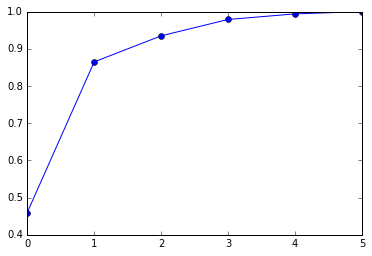

In [3]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
#print pca.components_
pca_comp= pd.DataFrame( pca.components_, columns=[' Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper','Delicatessen'])
print pca_comp
print
print pca.explained_variance_ratio_

x = np.arange(6)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: the variance for the frirst two dimensions are quite equal, the variances drop off very quick for the other four dimensions. Therefore I use the first two dimensions. We could use a cutoff value instead too. This cutoff value could be choosen that we retain 90% of variance.



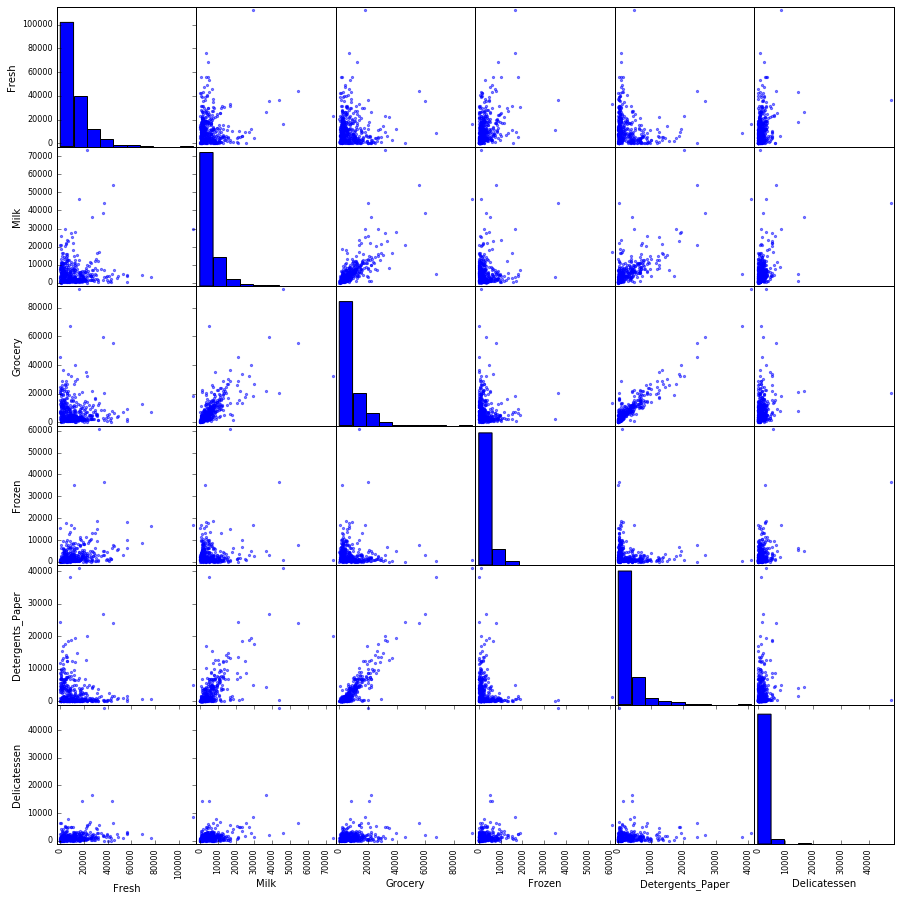

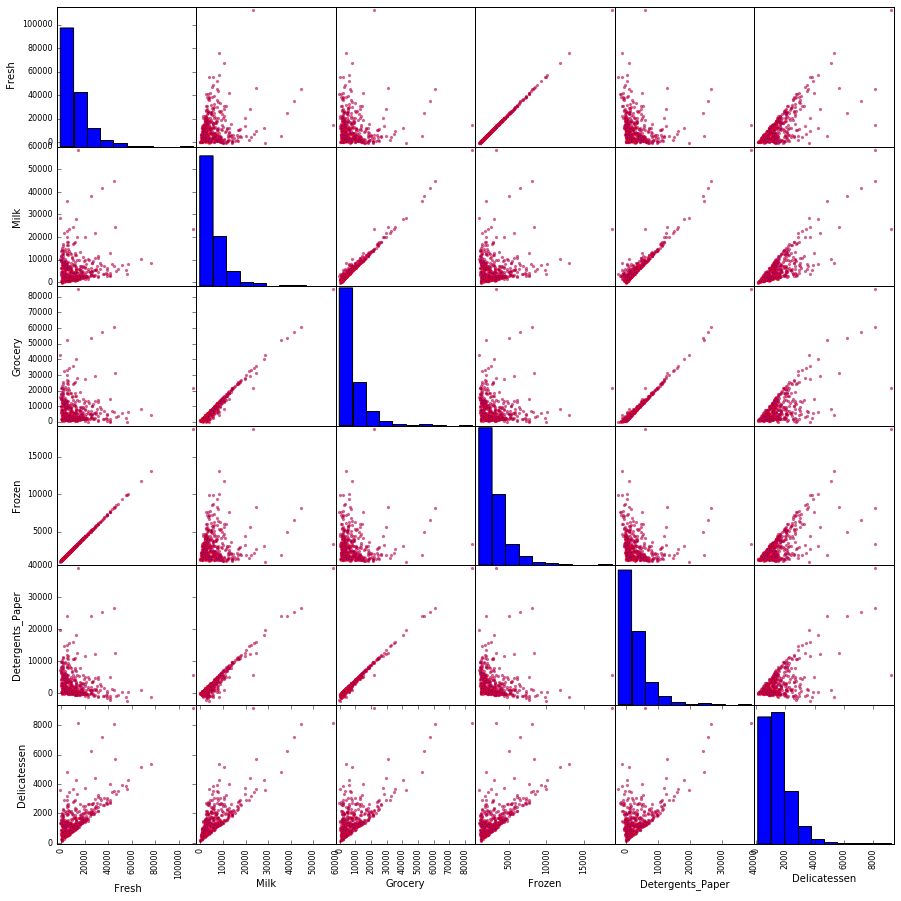

In [4]:
pcar=PCA(n_components=2)
X_2=pcar.fit_transform(data)

X_reconstructed = pcar.inverse_transform(X_2)
dfr= pd.DataFrame(X_reconstructed, columns=[' Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper','Delicatessen'])
s=scatter_matrix(data,figsize=(15, 15),color='b')
s1=scatter_matrix(dfr,figsize=(15, 15),color='r')


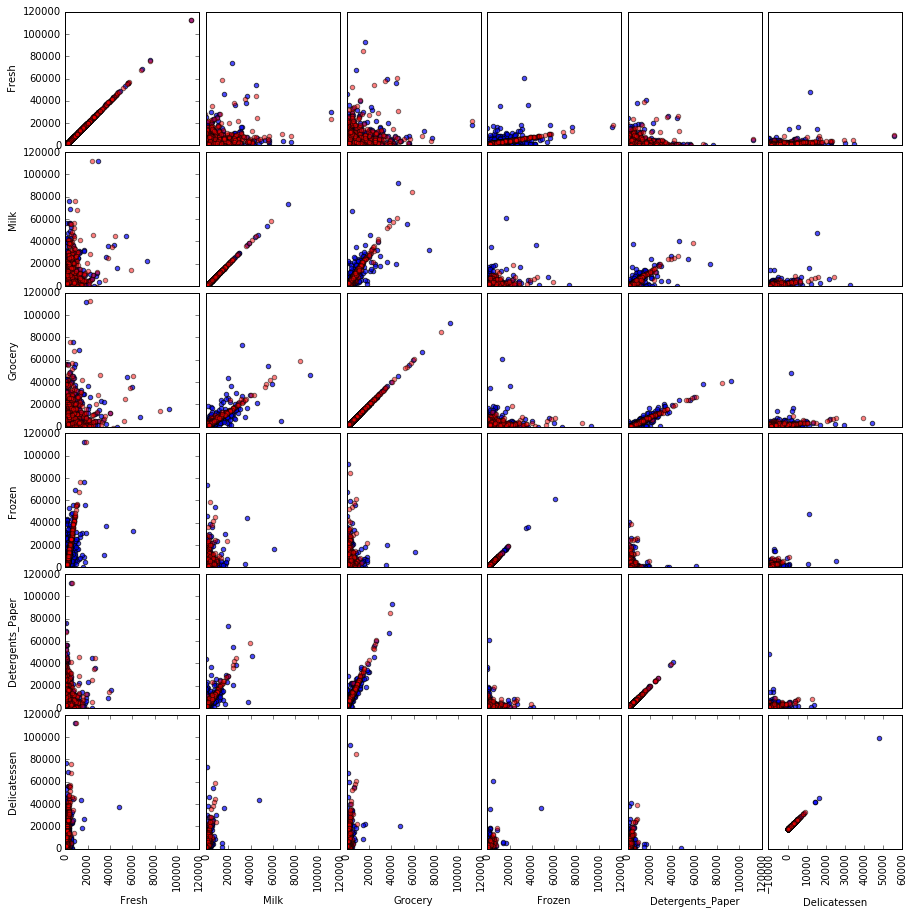

In [5]:
X=data.as_matrix()
labels=[' Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper','Delicatessen']
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.05)
for i in xrange(6):
    
    for j in xrange(6):
        
        plt.xlim(0, 120000)
        plt.ylim(0, 120000)
        plt.subplot(6, 6, i * 6 + j + 1)
        plt.scatter(X[:,i], X[:,j],c='b',alpha=0.7)
        plt.scatter(X_reconstructed[:,i], X_reconstructed[:,j],c='r',alpha=0.5)
        plt.axis('equal')
        if i<5 and j>0:
            plt.xticks(())
            plt.yticks(())
        if i<5: 
            plt.xticks(())
        if j>0:
            plt.yticks(())
        if i==5:
            plt.xticks(rotation='vertical')
            plt.xlabel(labels[j])
        if j==0:
           
            plt.ylabel(labels[i])
                            

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 
The first component of the PCA components shows high (negative) values for (Fresh, Frozen).
The second compoent of the PCA compoents shows high values for (Milk, Grocery, Detergents_Paper). 

Therefore the first dimension (first PCA component) represents (Fresh, Frozen), the second dimension (second PCA component) represents (Milk, Grocery, Detergents_Paper).

The scatterplots above shows almost linear relationsships between:
- Frozen and Fresh
- Grocery and Milk
- Grocery  and Detergents_Paper
- Milk and Detergents Paper
which supports the analysis based on the PCA components.

What can we do with this information? The  analysis shows that there are two very important dimensions behind the raw data. We can use this information as a starting point for customer segmentation. Customer segmentation is important to treat different customers in a specific way. 

###ICA

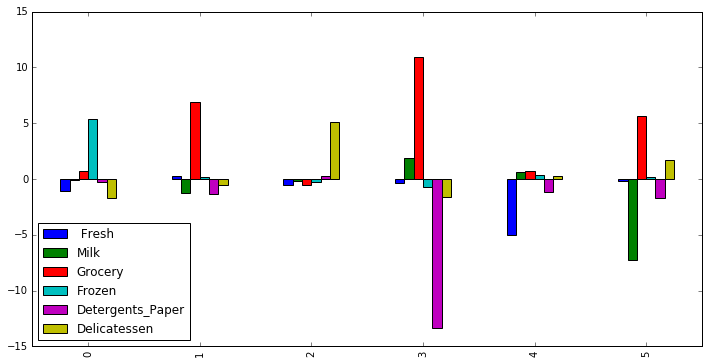

In [6]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing as pre
ica = FastICA(random_state=42)
ica.fit(pre.scale(data))

# Print the independent components
#print ica.components_*1.0E8
comp=pd.DataFrame( ica.components_*1.0E2, columns=[' Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper','Delicatessen'])
comp

comp.plot(kind = 'bar', figsize=(12, 6))

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 
The main components of each vector are:
- vector 0: (Frozen +) Frozen seems to be independent from most of the other features and negative correlated to Delicatessen. A possible interpretation could be that customers either buy Frozen grocery or Delicatessen but not both. This makes sense as frozen grocery are not delicatessen. 
- vector 1: (Grocery +) Grocery seems to be independent from the other features.
- vector 2: (Delicatessen +) Delicatessen seems to be indenpendent from the other features. 
- vector 3: (Grocery +, Detergent_Papers-) Grocery and Detergent Papers seems to be negative correlated. A possible interpretation is that customers either buy Grocery or Deteregents. This makes sense since grocery and deteregents are very different products.
- vector 4: (Fresh -) Fresh seems to be independent from the other features.
- vector 5: (Milk -, Grocery+) Milk and Grocery seems to be negative correlated. A possible interpretation is that customers are either buy Milk or Grocery. For me it is a little bit strange since milk can be classified as grocery too. But there is not enough inforation provided to explain that.

With exception of vector3 and 5 the vectors just represent the features themself. 

What could this components be used for?
For example vector 0 shows cleary that frozen goods are anticorrelated with delicatessen. This could mean that there a customers which order frozen goods and customers which order delicatessen. For frozen goods the delivery time is not important but for delicatessen delivery in the evening may be a bad idea. Therefore both groups of customers shall be treated differently.
Vector 3 shows a anticorrelation between Grocery and Detergent Papers. This could be an indication that there are grocery shops and pharmacies behind. Maybe groceries and pharmacies shall be treated differently.
Vector 1:  (Grocery), vector 2: (Delicatessen), vector 4 (Fresh) are interesting because fresh means some kind of grocery and delicatessen means some kind of grocery too. Maybe it is only one customer group behind: groceries, but it could be that there are also specialisied shops behind which sells mainly delicatessen for example.  Fresh goods shall not be delivered at evening, because they would not be fresh anymore the next morning 



##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
Advantages of K Means clustering:
- very large datasets possible (very scalable)
- only one parameter (number of clusters)
Disadvantages of K Means clustering:
- even cluster size will be the best
- not too many clusters possible
- flat geometry preferred

Advantages of Gaussion Mixture Models
- good for density estimation
Disadvantages:
- many parameters
- not scalable
- flat geometry preferred

Gaussian Mixture Models can as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

I decided to use K-Means since density estimation is not required for our purposes.


**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [7]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


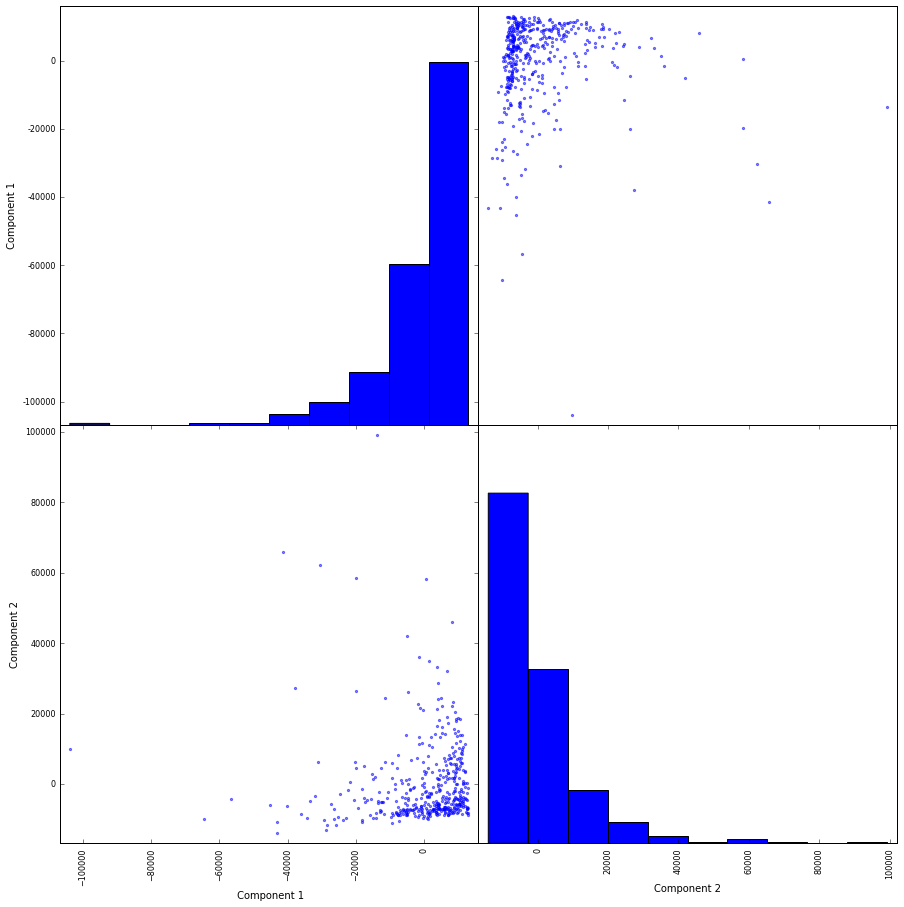

In [8]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pcar=PCA(n_components=2)
reduced_data =pcar.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements
dfr= pd.DataFrame(reduced_data, columns=[' Component 1', 'Component 2'])
s=scatter_matrix(dfr,figsize=(15, 15),color='b')

 2 clusters silhouette score: 0.542606292857
 3 clusters silhouette score: 0.522912082404
 3 clusters silhouette score: 0.454297633347
KMeans(copy_x=True, init='random', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


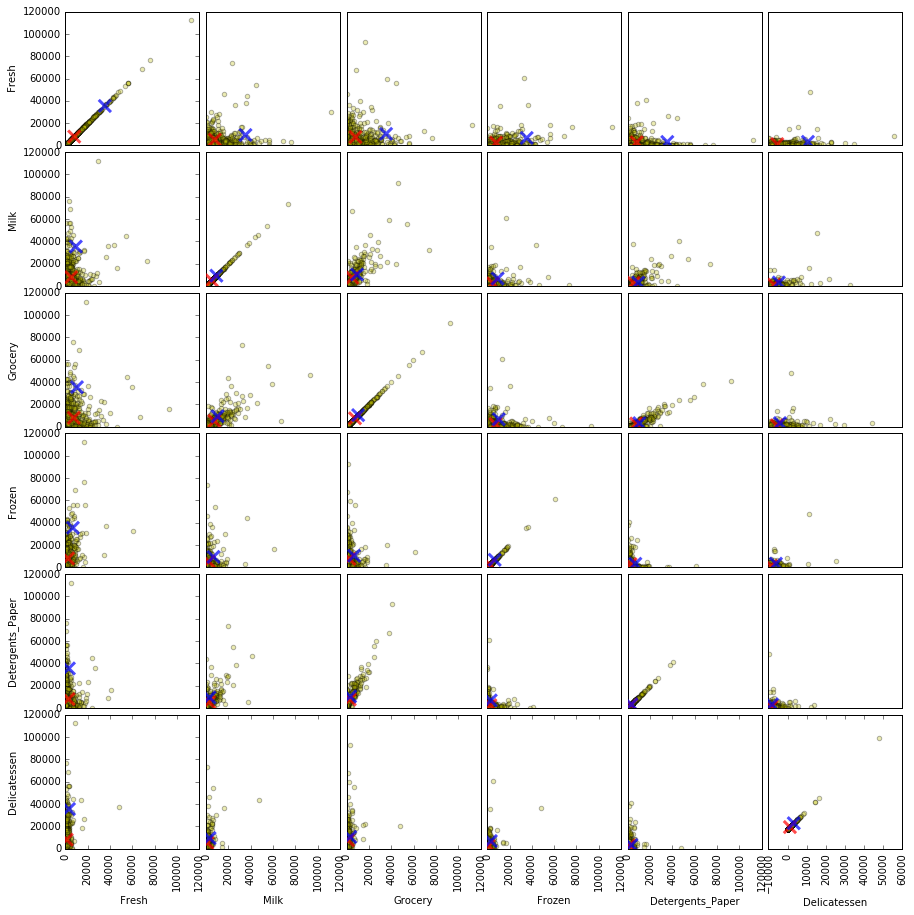

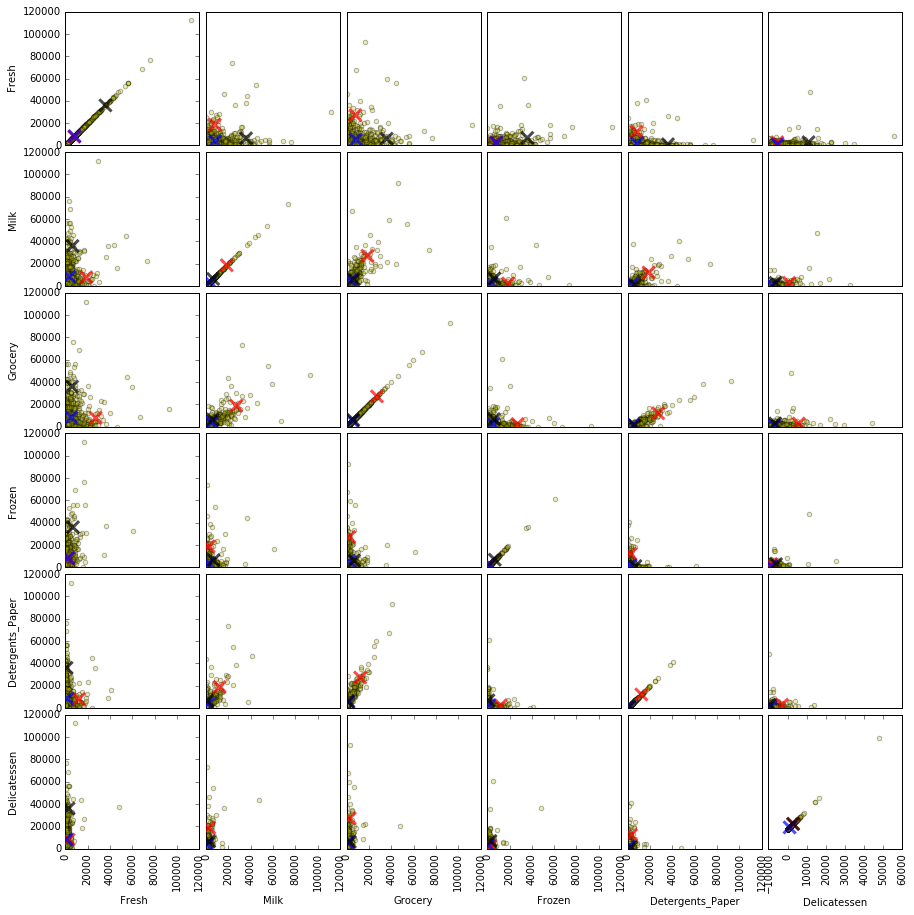

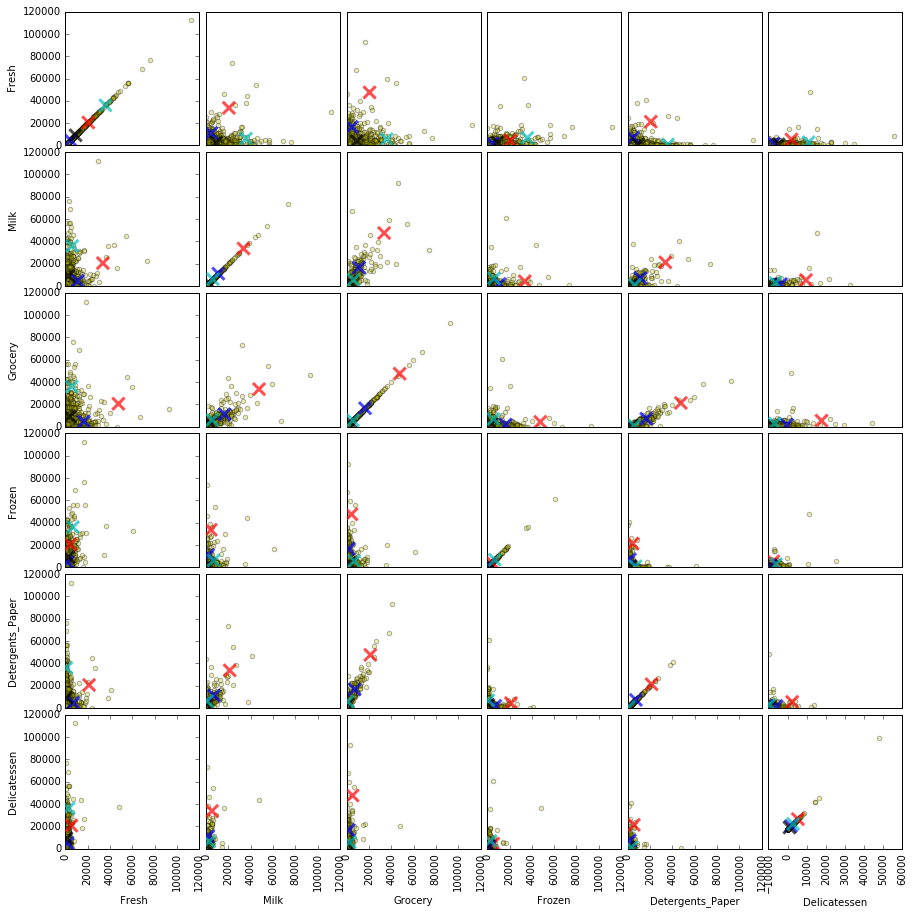

In [12]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
from sklearn import metrics
def plotdataWithClusterCenters(data,centers,n):
    X=data.as_matrix()
    colors=["r","b","k","c"]
    labels=[' Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper','Delicatessen']
    plt.figure(figsize=(15,15))
    plt.subplots_adjust(wspace=0.05)
    plt.subplots_adjust(hspace=0.05)
   
    for i in xrange(6):

        for j in xrange(6):

            plt.xlim(0, 120000)
            plt.ylim(0, 120000)
            plt.subplot(6, 6, i * 6 + j + 1)
            plt.scatter(X[:,i], X[:,j],c='y',alpha=0.3)
            plt.scatter(centers[:,i], centers[:,j],c=colors,alpha=0.7,marker="x", s=150, linewidths=3, zorder=10)
            plt.axis('equal')
            if i<5 and j>0:
                plt.xticks(())
                plt.yticks(())
            if i<5: 
                plt.xticks(())
            if j>0:
                plt.yticks(())
            if i==5:
                plt.xticks(rotation='vertical')
                plt.xlabel(labels[j])
            if j==0:

                plt.ylabel(labels[i])
                            

kmeans = KMeans(init='random', n_clusters=2, n_init=10)

clusters = kmeans.fit(reduced_data)
print " 2 clusters silhouette score:", metrics.silhouette_score(reduced_data, kmeans.labels_, metric='euclidean', sample_size=reduced_data.size)
centers=pcar.inverse_transform( kmeans.cluster_centers_)
plotdataWithClusterCenters(data,centers,2)

kmeans = KMeans(init='random', n_clusters=3, n_init=10)
clusters = kmeans.fit(reduced_data)
print " 3 clusters silhouette score:",metrics.silhouette_score(reduced_data, kmeans.labels_, metric='euclidean', sample_size=reduced_data.size)
centers=pcar.inverse_transform( kmeans.cluster_centers_)
plotdataWithClusterCenters(data,centers,3)

kmeans = KMeans(init='random', n_clusters=4, n_init=10)
clusters = kmeans.fit(reduced_data)
print " 3 clusters silhouette score:",metrics.silhouette_score(reduced_data, kmeans.labels_, metric='euclidean', sample_size=reduced_data.size)
centers=pcar.inverse_transform( kmeans.cluster_centers_)
plotdataWithClusterCenters(data,centers,4)

print clusters

Based on the silhouette score 2 clusters seems the best choise, but 3 clusters has only a slightly worser score, 4 clusters have a much lower score. Based on the cluster centers in the original dimensions seems to be the better choice. Therefore I decided to use 3 clusters.

In [13]:
kmeans = KMeans(init='random', n_clusters=3, n_init=10)
clusters = kmeans.fit(reduced_data)

In [14]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [15]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = kmeans.cluster_centers_

print centroids

[[-23978.86566553  -4445.56611772]
 [  1341.31124554  25261.39189714]
 [  4165.1217824   -3105.15811456]]


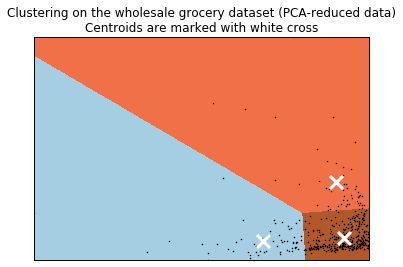

In [16]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

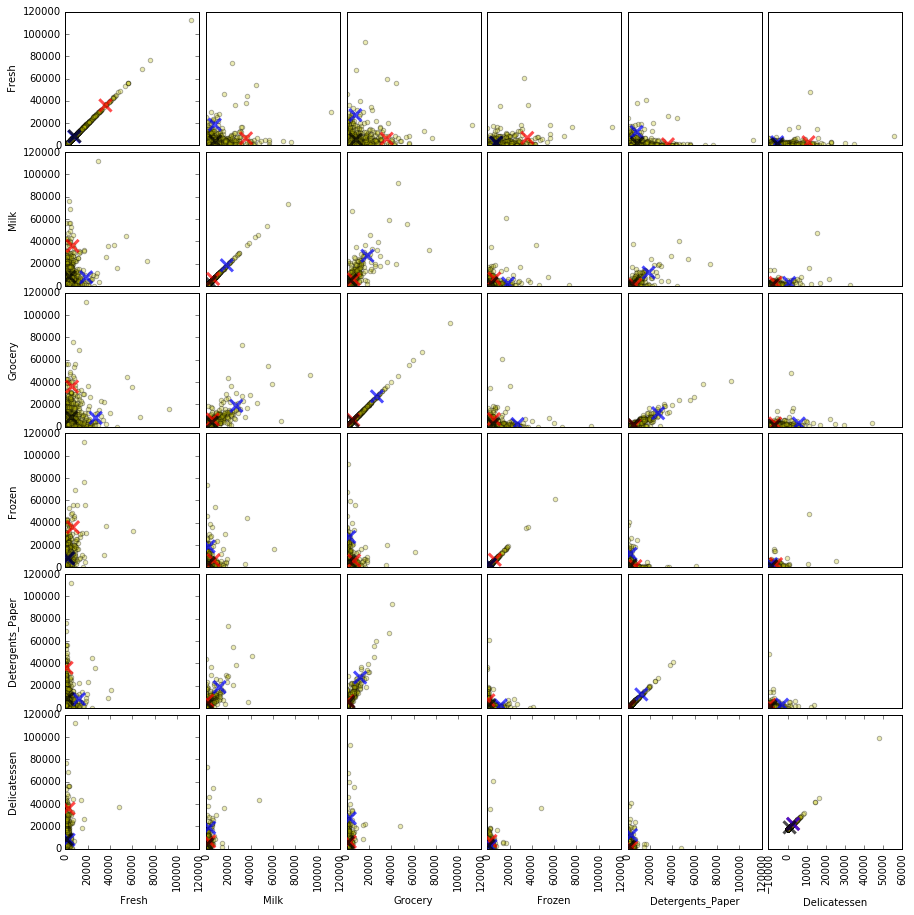

In [18]:
centers=pcar.inverse_transform( kmeans.cluster_centers_)
plotdataWithClusterCenters(data,centers,3)

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

Above we had identified the two PCA dimensions: (Grocery, Detergents_Paper, Milk) and  (Frozen, Fresh)

- The custoemrs in the lower right corner could be described as customers who orders low quantities, but these customers are many. 
- The other customers order either higher quantities of (Grocery, Detergents_Paper, Milk)  or (Frozen, Fresh)

The visualization of the cluster centers in the original dimesions gives a more detailed picture:


many customers which order low quanties (small shops of different kind)
(fresh <20000 and milk <20000) 
(fresh <20000 and grocery <20000)
(fresh <20000 and frozen<20000)
(fresh <20000 and detergents<20000) 
(fresh <20000 and delicatessen<20000)

a number of customers  which order (medium sized shops for mainly fresh goods?)
(fresh ~20000 and milk <20000)  
(fresh  ~30000 and grocery <20000)
(fresh ~20000 and detergents<20000) 

a number of customers  which order:

(fresh <20000 and milk ~40000)   
(fresh <20000 and grocery ~40000)
(fresh <20000 and frozen~40000)
the three groups above maybe medium sized groceries

(fresh <20000 and detergents~40000)  --> maybe medium sized pharmacies
(fresh <20000 and delicatessen~20000) --> maybe medium sized shops for delicatessen

a number of customers  which order (maybe small groceries)
(milk <20000 and grocery <20000)
(milk <20000 and frozen <20000)
(milk <2000 and detergents paper)
(milk <20000 and delicatessen <20000)

a number of customers  which order
(milk ~40000 and grocery ~20000)

a number of customers which order
(grocery <20000 and detergents ~40000) --> maybe medium sized pharmacies

a number of customers which order
(delicatessen 20000 to 40000) --> maybe medium sized shops for delicatessen


In general the number of customes who order high quanties >40000 of one or more goods are small, but they are important special customers.


###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: It is difficult to give an clear answer. PCA seems to be most useful as dimension reduction technique which extracts the most of the information in the data and maps it to a space with much lower dimensions.  These dimensions are not easy to interpret. ICA is very useful in signal analysis but for this dataset I had some problems to interpret the results. But it gives some insight that a number of features seem to be quite independet from the other like Delicatesses or Grocery or Frozen.
Clustering leads to a customer segmentation.  This is a useful result too and it can be used for further actions and experiments.

As summary I have no clear preference. PCA in combination with clustering gives the most insight in my opinion. 


**9)** How would you use that technique to help the company design new experiments?

Answer: Clustering allows customer segmentation. This allows new experiments with regard to the corresponding customer segments. For example to find out if the reaction to devlivery changes are different for each customer segment. This would allow to design specific delivery schedules for each customer segment.  ICA could be helpful too because Fresh and Frozen and Delicatesses and general Grocery may require different develivery strategies. I would design experiments based on the results of ICA too.

For example we can use an A/B test.  A possible A/B test could be:
1. Choose the segment of customers in the lower right corner above. Split them up into two groups of 50% each. 
2. For group A change the delivery to evening, for group B don't change delivery.
3. Measure the reaction of group A compared with group B.
4. Based on the result implement delivery on evening or not,


**10)** How would you use that data to help you predict future customer needs?

Answer: 
Based on the customer segmentation by clustering and ICA talk with a number of customers of each segment to learn more about their current and future needs.

Currently not much is know about the customer only the order quanatities of the 6 goods. This alone makes a prediction with supervised learning impossible, since we have no labels. Therefore we need labels. A/B tests could  be used to get such labels, for example: sensitive to delivery time or not sensitive to delivery time. Then we could train a classifier to predict for the other customer which were not part of the A/B test how sensitive they are to delivery time and treat them accordingly.

